In [84]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(stringr)
library(RColorBrewer)

library(RColorBrewer)
library(colorRamps)
library(pals)

Warning message:
"package 'pals' was built under R version 3.6.3"

In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure 5/")

In [3]:
regulons<-read_delim('mean_reg_act_timepoint.csv',delim=';')
motifs<-read_delim('motif_enrich.csv',delim=';')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  timepoint = col_character(),
  mean_reg_act = col_number()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_character(),
  timepoint = col_character(),
  motif_enrich = col_double()
)


In [4]:
head(regulons)
head(motifs)

X1,timepoint,mean_reg_act
AKR1A1,day0,0.6410462
AKR1A1,day10,0.1353005
AKR1A1,day12,0.1480162
AKR1A1,day8,0.1314889
AKR1A1,day9,0.1347021
AKR1A1,iPSCs,0.1345624


X1,timepoint,motif_enrich
CTCF,day0,33.94
CTCF,day10,24.79
CTCF,day12,17.03
CTCF,day8,25.11
CTCF,day9,24.30
CTCF,iPSCs,16.99


In [5]:
motifs$fused<-paste(motifs$X1,motifs$timepoint)
regulons$fused<-paste(regulons$X1,regulons$timepoint)

In [6]:
head(motifs)
head(regulons)

X1,timepoint,motif_enrich,fused
CTCF,day0,33.94,CTCF day0
CTCF,day10,24.79,CTCF day10
CTCF,day12,17.03,CTCF day12
CTCF,day8,25.11,CTCF day8
CTCF,day9,24.30,CTCF day9
CTCF,iPSCs,16.99,CTCF iPSCs


X1,timepoint,mean_reg_act,fused
AKR1A1,day0,0.6410462,AKR1A1 day0
AKR1A1,day10,0.1353005,AKR1A1 day10
AKR1A1,day12,0.1480162,AKR1A1 day12
AKR1A1,day8,0.1314889,AKR1A1 day8
AKR1A1,day9,0.1347021,AKR1A1 day9
AKR1A1,iPSCs,0.1345624,AKR1A1 iPSCs


In [7]:
columns<-c("fused","motif_enrich")
columns2<-c("fused","mean_reg_act")

In [8]:
motifs2<-motifs[columns]
regulons2<-regulons[columns2]

In [9]:
merged2 <- merge(regulons2, motifs2, by = "fused", all = TRUE)

In [10]:
head(merged2)

fused,mean_reg_act,motif_enrich
AKR1A1 day0,0.6410462,NA
AKR1A1 day10,0.1353005,NA
AKR1A1 day12,0.1480162,NA
AKR1A1 day8,0.1314889,NA
AKR1A1 day9,0.1347021,NA
AKR1A1 iPSCs,0.1345624,NA


In [11]:
merged2_new<-na.omit(merged2)

In [12]:
head(merged2_new)

,fused,mean_reg_act,motif_enrich
55,ATF3 day0,0.05229177,0.00
56,ATF3 day10,0.06458224,16.24
57,ATF3 day12,0.05225725,16.15
58,ATF3 day8,0.05683708,18.72
59,ATF3 day9,0.04967333,16.90
60,ATF3 iPSCs,0.02462733,16.85


In [13]:
merged3<-strsplit(as.character(merged2_new$fused), " ")

In [14]:
new<- data.frame(merged2_new$mean_reg_act, merged2_new$motif_enrich, do.call(rbind, merged3))

In [15]:
head(new)

merged2_new.mean_reg_act,merged2_new.motif_enrich,X1,X2
0.05229177,0.00,ATF3,day0
0.06458224,16.24,ATF3,day10
0.05225725,16.15,ATF3,day12
0.05683708,18.72,ATF3,day8
0.04967333,16.90,ATF3,day9
0.02462733,16.85,ATF3,iPSCs


In [16]:
names(new)[1]<-paste("reg_act")
names(new)[2]<-paste("motif_enrich")
names(new)[3]<-paste("TF")
names(new)[4]<-paste("timepoint")

In [17]:
head(new)

reg_act,motif_enrich,TF,timepoint
0.05229177,0.00,ATF3,day0
0.06458224,16.24,ATF3,day10
0.05225725,16.15,ATF3,day12
0.05683708,18.72,ATF3,day8
0.04967333,16.90,ATF3,day9
0.02462733,16.85,ATF3,iPSCs


In [27]:
write.table(new, "new.txt", sep="\t")

In [3]:
new<-read_delim('MOTIFS_REGULONS_OVERLAP.csv',delim=';')

Parsed with column specification:
cols(
  reg_act = col_double(),
  motif_enrich = col_double(),
  TF = col_character(),
  timepoint = col_character()
)


In [4]:
day0_new <- new[new$timepoint=='day0',]
day8_new <- new[new$timepoint=='day8',]
day9_new <- new[new$timepoint=='day9',]
day10_new <- new[new$timepoint=='day10',]
day12_new <- new[new$timepoint=='day12',]
iPSCs_new <- new[new$timepoint=='iPSCs',]

In [5]:
head(day0_new)
head(day8_new)
head(day9_new)
head(day10_new)
head(day12_new)
head(iPSCs_new)

reg_act,motif_enrich,TF,timepoint
0.052291769,0,ATF3,day0
0.002694732,0,BACH2,day0
0.006573377,0,BATF,day0
0.007893637,0,CREB5,day0
0.123287439,0,E2F4,day0
0.012370087,0,E2F7,day0


reg_act,motif_enrich,TF,timepoint
0.056837075,18.72,ATF3,day8
0.005910656,0.00,BACH2,day8
0.002536754,19.57,BATF,day8
0.001173315,0.00,CREB5,day8
0.137901394,0.00,E2F4,day8
0.020877058,0.00,E2F7,day8


reg_act,motif_enrich,TF,timepoint
0.049673330,16.90,ATF3,day9
0.001430308,0.00,BACH2,day9
0.003309090,18.31,BATF,day9
0.000000000,0.00,CREB5,day9
0.174705947,0.00,E2F4,day9
0.038883564,0.00,E2F7,day9


reg_act,motif_enrich,TF,timepoint
0.064582245,16.24,ATF3,day10
0.004810215,5.98,BACH2,day10
0.001551228,18.52,BATF,day10
0.002065638,9.69,CREB5,day10
0.090919357,0.00,E2F4,day10
0.022423128,0.00,E2F7,day10


reg_act,motif_enrich,TF,timepoint
0.052257248,16.15,ATF3,day12
0.002800400,4.99,BACH2,day12
0.003359446,16.74,BATF,day12
0.001116453,0.00,CREB5,day12
0.138544052,19.53,E2F4,day12
0.042101490,6.75,E2F7,day12


reg_act,motif_enrich,TF,timepoint
0.0246273289,16.85,ATF3,iPSCs
0.0019773919,5.34,BACH2,iPSCs
0.0004038988,17.26,BATF,iPSCs
0.0000000000,8.90,CREB5,iPSCs
0.1741742645,18.63,E2F4,iPSCs
0.0546984739,6.58,E2F7,iPSCs


In [204]:
nrow(day0_new)
nrow(day8_new)
nrow(day9_new)
nrow(day10_new)
nrow(day12_new)
nrow(iPSCs_new)

[1] 29

[1] 30

[1] 30

[1] 29

[1] 30

[1] 30

In [205]:
write.table(day0_new, "day0_new.txt", sep="\t")
write.table(day10_new, "day10_new.txt", sep="\t")

In [207]:
day0_new<-read_delim('day0_new.csv',delim=';')
day10_new<-read_delim('day10_new.csv',delim=';')

Parsed with column specification:
cols(
  reg_act = col_double(),
  motif_enrich = col_double(),
  TF = col_character(),
  timepoint = col_character()
)
Parsed with column specification:
cols(
  reg_act = col_double(),
  motif_enrich = col_double(),
  TF = col_character(),
  timepoint = col_character()
)


In [209]:
nrow(day0_new)
nrow(day10_new)

[1] 30

[1] 30

In [15]:
head(day8_new)

reg_act,motif_enrich,TF,timepoint
0.056837075,18.72,ATF3,day8
0.005910656,0.00,BACH2,day8
0.002536754,19.57,BATF,day8
0.001173315,0.00,CREB5,day8
0.137901394,0.00,E2F4,day8
0.020877058,0.00,E2F7,day8


In [160]:
options(repr.plot.width=5, repr.plot.height=5)

In [164]:
day8_plot <- ggplot(day8_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, size= 8, label=TF, color = TF)) + 
 geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
#geom_text(aes(label=TF),hjust=0, vjust=2, size=8,show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Day 8")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


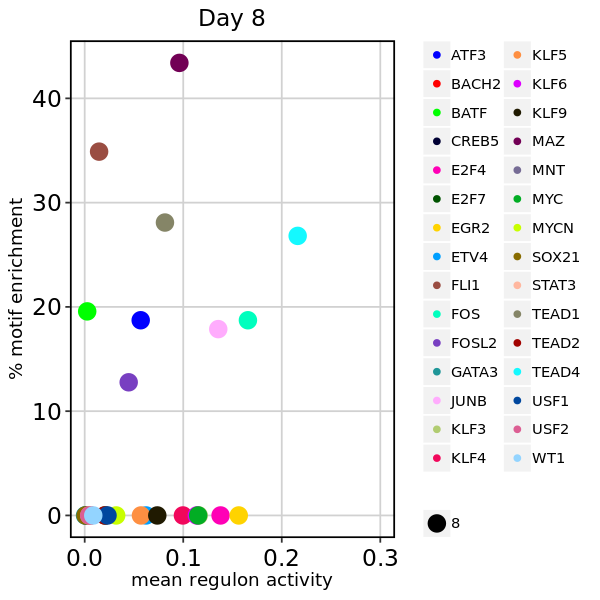

In [165]:
day8_plot

In [166]:

ggsave("day8_motifs_regulons.pdf",  useDingbats=FALSE)


Saving 6.67 x 6.67 in image


In [213]:
day0_plot <- ggplot(day0_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, shape = timepoint, size= 8, color=TF, label=TF)) + 
  geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
#geom_text(aes(label=TF),hjust=0, vjust=2, size=8, show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Day 0")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


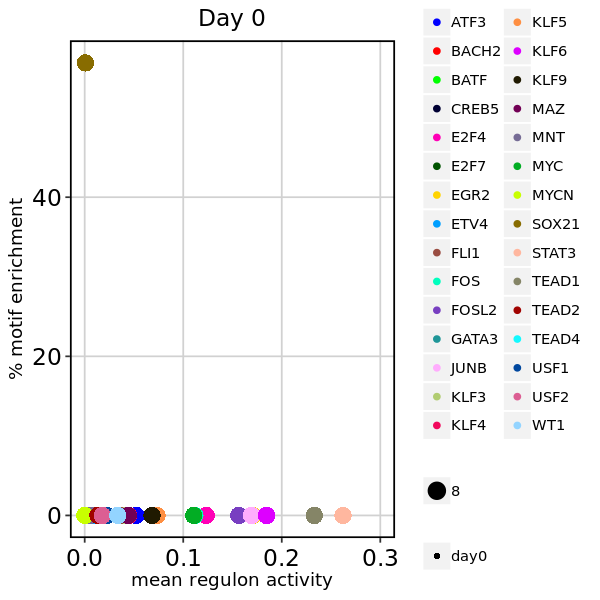

In [214]:
day0_plot

In [215]:
ggsave("day0_motifs_regulons.pdf",  useDingbats=FALSE)


Saving 6.67 x 6.67 in image


In [176]:
day9_plot <- ggplot(day9_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, shape = timepoint, size= 8, color=TF, label=TF)) + 
  geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
#geom_text(aes(label=TF),hjust=0, vjust=2, size=8,show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Day 9")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


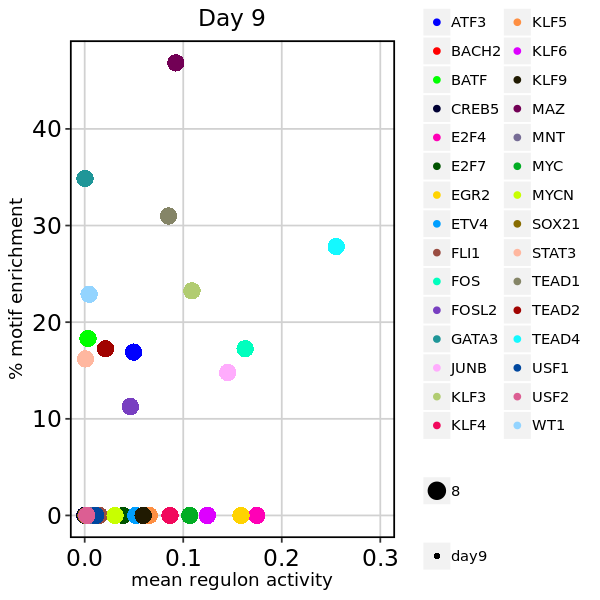

In [177]:
day9_plot

In [178]:

ggsave("day9_motifs_regulons.pdf",  useDingbats=FALSE)


Saving 6.67 x 6.67 in image


In [219]:
day10_plot <- ggplot(day10_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, shape = timepoint, size= 8, color=TF, label=TF)) + 
  geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
#geom_text(aes(label=TF),hjust=0, vjust=2, size=8,show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Day 10")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


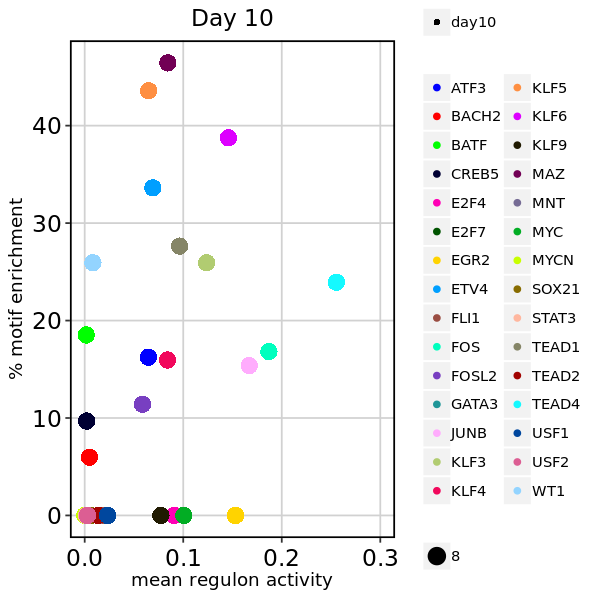

In [220]:
day10_plot

In [221]:
ggsave("day10_motifs_regulons.pdf",  useDingbats=FALSE)


Saving 6.67 x 6.67 in image


In [188]:
day12_plot <- ggplot(day12_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, shape = timepoint, size= 8, color=TF, label=TF)) + 
  geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
geom_text(aes(label=TF),hjust=0, vjust=2, size=8,show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Day 12")+

theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


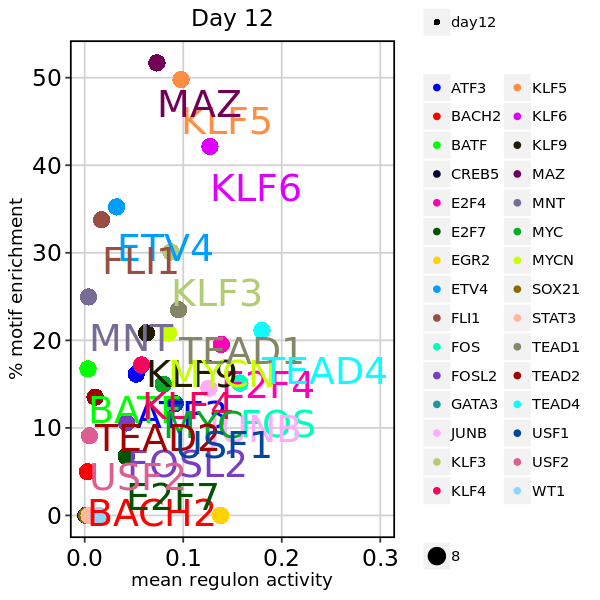

In [189]:
day12_plot

In [190]:

ggsave("day12_motifs_regulons_name.pdf",  useDingbats=FALSE)

Saving 6.67 x 6.67 in image


In [194]:
iPSCs_plot <- ggplot(iPSCs_new, aes(x=reg_act, y=motif_enrich, show.legend=FALSE, size= 8, color=TF, label=TF)) + 
  geom_point()+
scale_fill_manual(values = as.vector(glasbey(30))) +
scale_color_manual(values = as.vector(glasbey(30)))+
#geom_text(aes(label=TF),hjust=0, vjust=2, size=8,show.legend=FALSE)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("iPSCs")+

theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


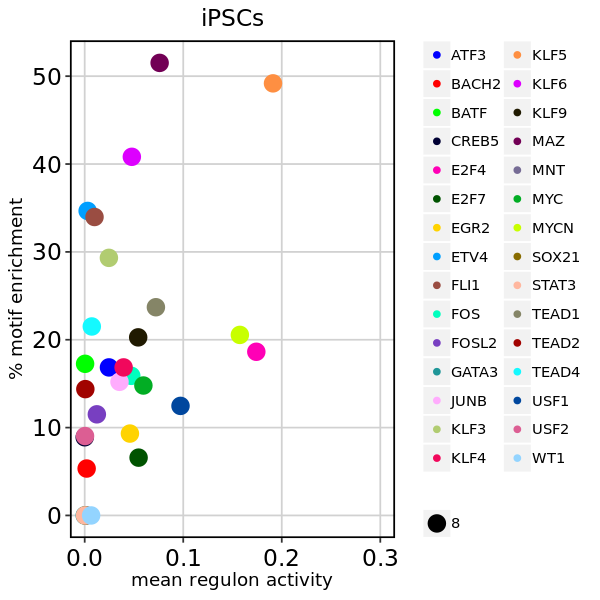

In [195]:
iPSCs_plot

In [196]:
ggsave("iPSCs_motifs_regulons.pdf",  useDingbats=FALSE)

Saving 6.67 x 6.67 in image


In [142]:
write.table(new, "new.txt", sep="\t")

In [254]:
klf5<-read_delim('klf5.csv',delim=';')

Parsed with column specification:
cols(
  reg_act = col_double(),
  motif_enrich = col_double(),
  TF = col_character(),
  timepoint = col_character()
)


In [293]:
options(repr.plot.width=4, repr.plot.height=4)

In [297]:
plot_klf5 <- ggplot(klf5, aes(x=reg_act, y=motif_enrich, show.legend=TRUE, color = timepoint, size=4)) + 
  geom_point()+
scale_fill_brewer(palette="Accent")+
scale_color_brewer(palette = "Accent")+
geom_text(aes(label=timepoint),hjust=0, vjust=2, size=10)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=20, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=20,hjust=0.5))+
ggtitle("KLF5")+
theme(axis.text.y  = element_text(color = "black",size=20))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


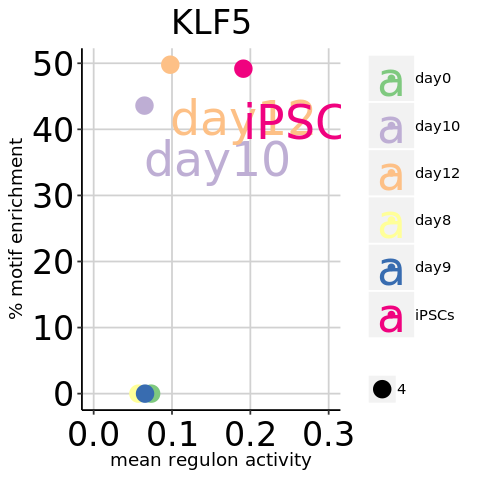

In [298]:
plot_klf5

In [299]:
ggsave("motifs_regulons_KLF5.pdf")

Saving 6.67 x 6.67 in image


In [300]:
tead4<-read_delim('tead4.csv',delim=';')

Parsed with column specification:
cols(
  reg_act = col_double(),
  motif_enrich = col_double(),
  TF = col_character(),
  timepoint = col_character()
)


In [301]:
plot_tead4 <- ggplot(tead4, aes(x=reg_act, y=motif_enrich, show.legend=TRUE, color = timepoint, size=4)) + 
  geom_point()+
scale_fill_brewer(palette="Accent")+
scale_color_brewer(palette = "Accent")+
geom_text(aes(label=timepoint),hjust=0, vjust=2, size=10)+
coord_cartesian(ylim=c(0,60))+
coord_cartesian(xlim=c(0,0.3))+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=20, color = "black"))+
xlab("mean regulon activity") +
ylab("% motif enrichment")+
theme(plot.title = element_text(size=20,hjust=0.5))+
ggtitle("TEAD4")+
theme(axis.text.y  = element_text(color = "black",size=20))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


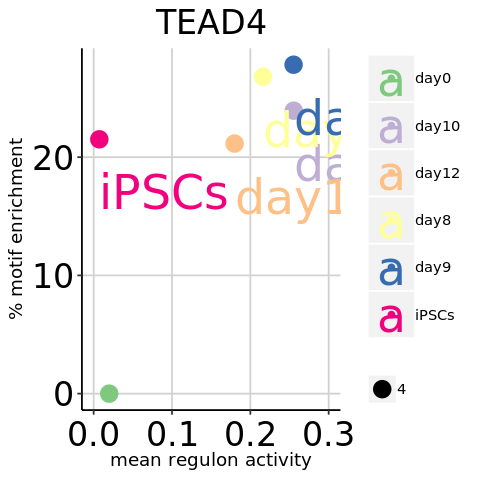

In [302]:
plot_tead4

In [303]:
ggsave("motifs_regulons_TEAD4.pdf")

Saving 6.67 x 6.67 in image
